In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("diabetes_prediction_dataset.xlsx")

In [5]:
sns.set(style="whitegrid")

In [6]:
df.rename(columns={'diabetes': 'target'}, inplace=True)

# Overview
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())
print("\nClass Distribution:\n", df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   target               100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
target                 0
dtype: int64

Summar

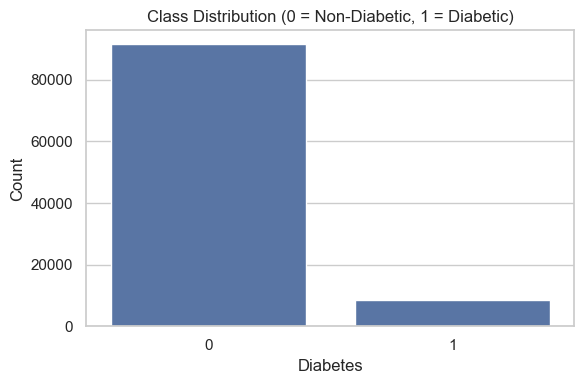

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0 = Non-Diabetic, 1 = Diabetic)')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


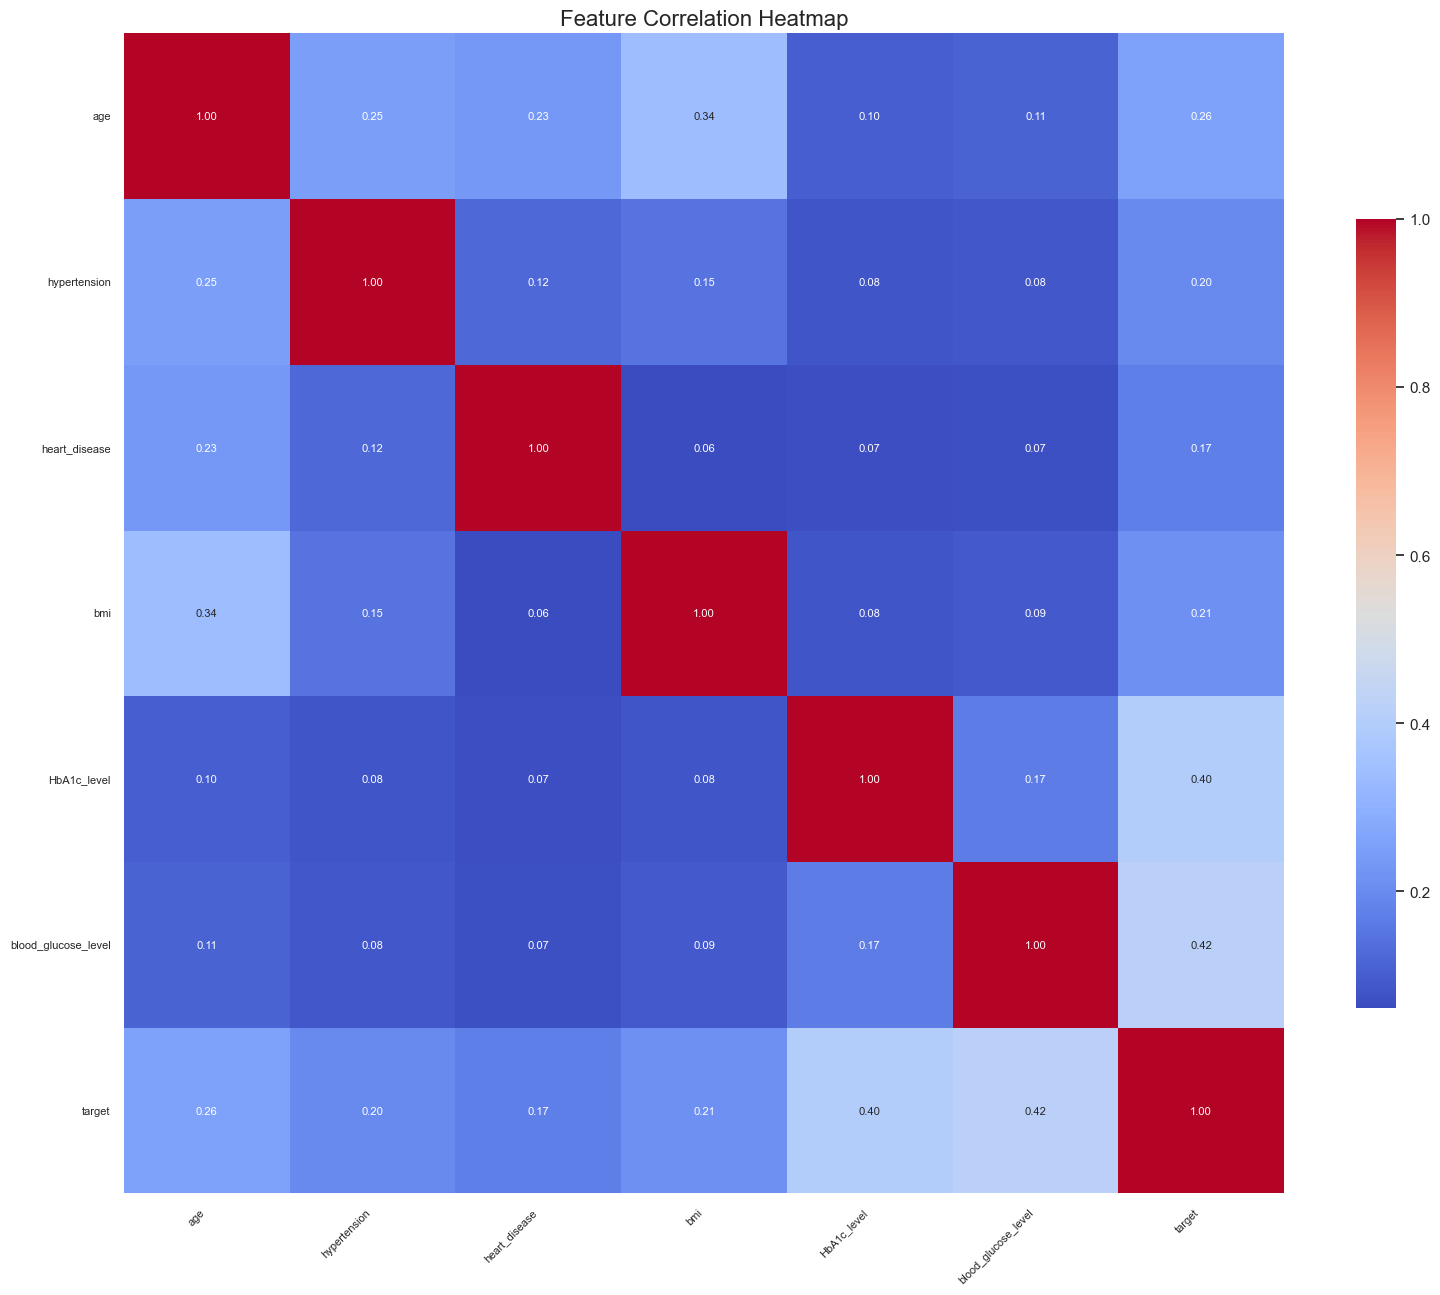

In [8]:
plt.figure(figsize=(16, 14))
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .6},
    annot_kws={"size": 8}
)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


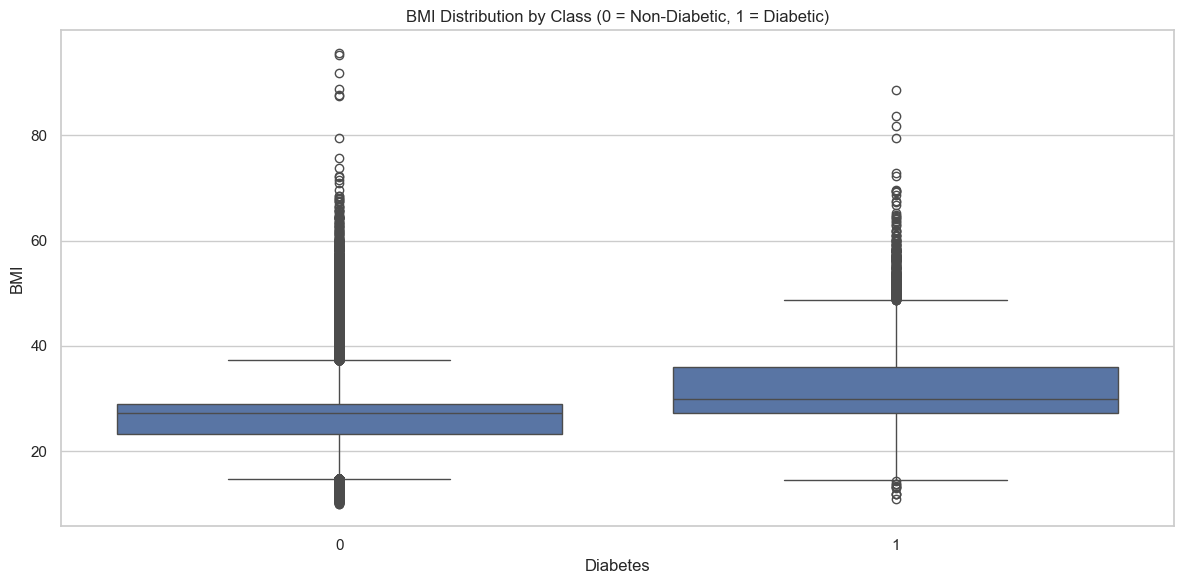

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='bmi', data=df)
plt.title('BMI Distribution by Class (0 = Non-Diabetic, 1 = Diabetic)')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()


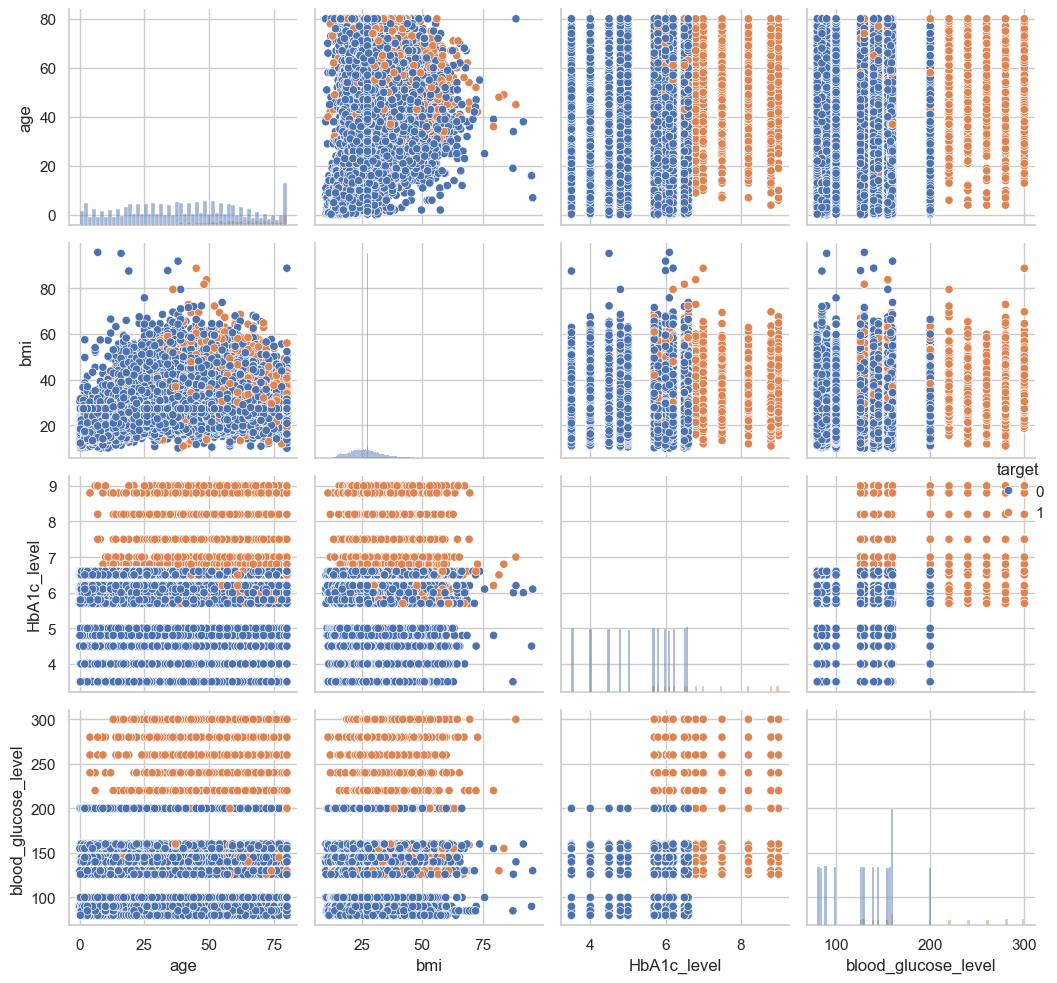

In [14]:
selected_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'target']

sns.pairplot(df[selected_features], hue='target', diag_kind='hist')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
df = pd.read_excel("diabetes_prediction_dataset.xlsx")  # adjust path if needed
df.rename(columns={'diabetes': 'target'}, inplace=True)

# Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Identify categorical and numerical features
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Check shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)
print()

# View a few scaled feature values
print("First 5 rows of scaled X_train:")
print(X_train[:5].toarray() if hasattr(X_train, 'toarray') else X_train[:5])
print()

# Check mean and std of first numeric feature after scaling
print("Mean of first feature (X_train):", np.mean(X_train[:, 0]))
print("Std of first feature (X_train):", np.std(X_train[:, 0]))



Training features shape: (80000, 13)
Test features shape: (20000, 13)
Training labels shape: (80000,)
Test labels shape: (20000,)

First 5 rows of scaled X_train:
[[ 1.37871976 -0.28630923 -0.20355869 -0.38647449 -1.89245106 -1.42515661
   1.          0.          0.          0.          1.          0.
   0.        ]
 [ 1.68986587 -0.28630923 -0.20355869 -0.41217229  0.16216906  0.17059059
   1.          0.          0.          0.          0.          1.
   0.        ]
 [-0.17701075 -0.28630923 -0.20355869 -0.45298645 -1.42549194  0.48974003
   0.          0.          0.          1.          0.          0.
   0.        ]
 [-0.71040407 -0.28630923 -0.20355869 -1.27833936 -0.4915737  -0.93415747
   0.          0.          0.          0.          0.          0.
   1.        ]
 [ 0.84532644  3.49272702 -0.20355869 -0.7885695  -0.95853282 -1.30240682
   0.          0.          1.          0.          0.          0.
   0.        ]]

Mean of first feature (X_train): -1.333155807969888e-16
Std 

Predictions on test set:
 [0 0 0 ... 0 0 0]

✅ Accuracy Score: 0.96995

✅ Confusion Matrix:
[[18226    66]
 [  535  1173]]

✅ Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     18292
    Diabetic       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



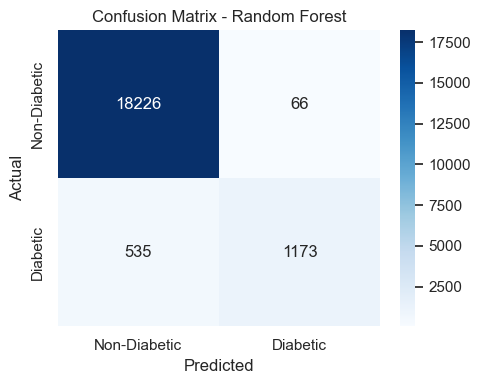

In [18]:
# MODEL TRAINING AND EVALUATION (USING RANDOM FOREST)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Show predictions
print("Predictions on test set:\n", y_pred)
print()

# Evaluate model performance
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

print("\n✅ Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Predictions on test set (Logistic Regression):
 [0 0 0 ... 0 0 0]

✅ Accuracy Score (Logistic Regression): 0.959

✅ Confusion Matrix (Logistic Regression):
[[18126   166]
 [  654  1054]]

✅ Classification Report (Logistic Regression):
              precision    recall  f1-score   support

Non-Diabetic       0.97      0.99      0.98     18292
    Diabetic       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



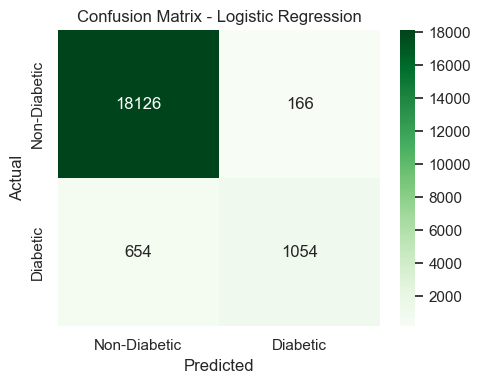

In [19]:
# MODEL TRAINING AND EVALUATION (USING LOGISTIC REGRESSION)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model with higher max_iter for convergence
log_model = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)
print("Predictions on test set (Logistic Regression):\n", y_pred_log)

# Evaluate performance
print("\n✅ Accuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred_log))

print("\n✅ Confusion Matrix (Logistic Regression):")
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

print("\n✅ Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log, target_names=["Non-Diabetic", "Diabetic"]))

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:05:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predictions on test set (XGBoost):
 [0 0 0 ... 0 0 0]

✅ Accuracy Score (XGBoost): 0.97125

✅ Confusion Matrix (XGBoost):
[[18233    59]
 [  516  1192]]

✅ Classification Report (XGBoost):
              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     18292
    Diabetic       0.95      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



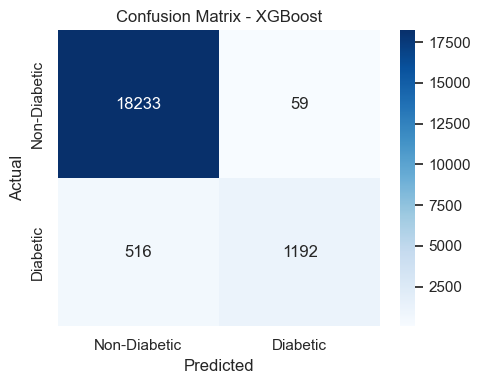

In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
print("Predictions on test set (XGBoost):\n", y_pred_xgb)

# Evaluate performance
print("\n✅ Accuracy Score (XGBoost):", accuracy_score(y_test, y_pred_xgb))

print("\n✅ Confusion Matrix (XGBoost):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

print("\n✅ Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=["Non-Diabetic", "Diabetic"]))

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\baner\appdata\local\programs\python\python312\lib\site-packages (3.0.2)




[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


📊 Model Accuracy Comparison:
Random Forest      : 0.96995
Logistic Regression: 0.959
XGBoost            : 0.97125


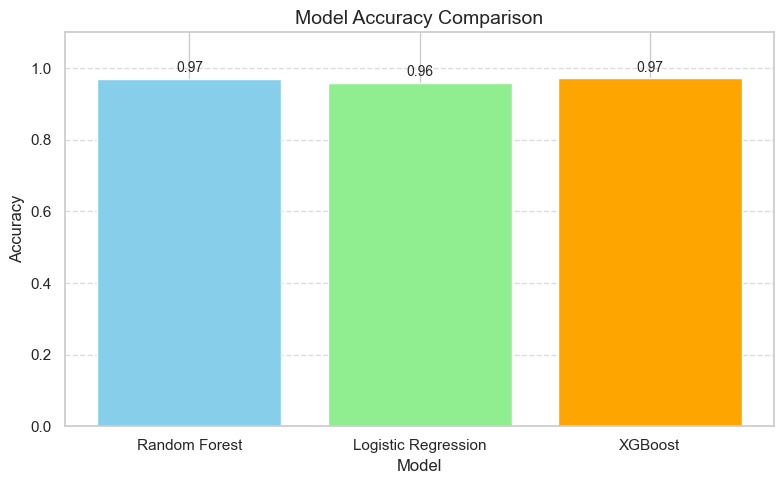

In [25]:
# 📊 Accuracy Comparison Table (Updated with XGBoost)
print("📊 Model Accuracy Comparison:")
print("Random Forest      :", accuracy_score(y_test, y_pred))
print("Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("XGBoost            :", accuracy_score(y_test, y_pred_xgb))

# 📈 Bar Graph Comparison
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_xgb)
]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange'])

# Annotate the bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1.1)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


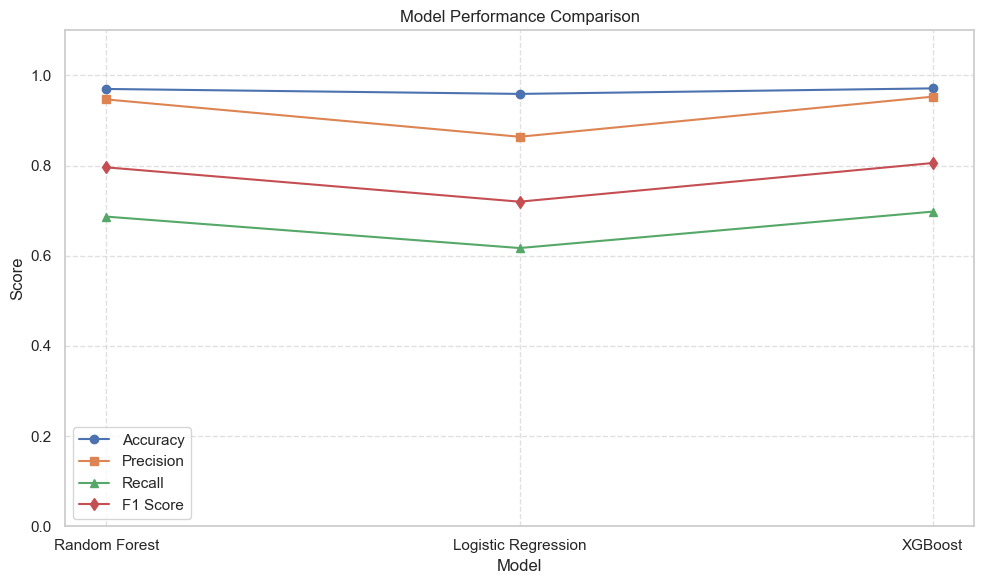

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect performance metrics for each model
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']

accuracy = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_xgb)
]

precision = [
    precision_score(y_test, y_pred),
    precision_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_xgb)
]

recall = [
    recall_score(y_test, y_pred),
    recall_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_xgb)
]

f1 = [
    f1_score(y_test, y_pred),
    f1_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_xgb)
]

# 📊 Line Plot for Multiple Metrics
plt.figure(figsize=(10,6))
plt.plot(model_names, accuracy, marker='o', label='Accuracy')
plt.plot(model_names, precision, marker='s', label='Precision')
plt.plot(model_names, recall, marker='^', label='Recall')
plt.plot(model_names, f1, marker='d', label='F1 Score')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\baner\AppData\Local\Temp\ipykernel_20324\2116809165.py:36: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_match, subset=['RF Match', 'LogReg Match', 'XGB Match'])


,Actual,Random Forest,Logistic Regression,XGBoost,RF Match,LogReg Match,XGB Match
0,0,0,0,0,True,True,True
1,0,0,0,0,True,True,True
2,0,0,0,0,True,True,True
3,0,0,0,0,True,True,True
4,0,0,0,0,True,True,True


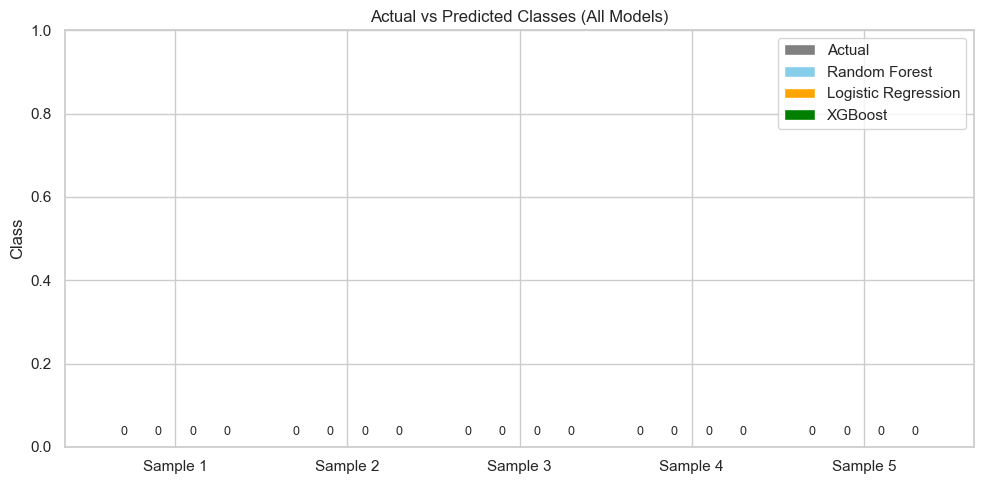

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Sampling and Prediction ---
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=5, replace=False)

X_sample = X_test[sample_indices]
y_actual = np.array(y_test)[sample_indices]

# Predictions from all three models
y_pred_rf = model.predict(X_sample)
y_pred_log = log_model.predict(X_sample)
y_pred_xgb = xgb_model.predict(X_sample)

# --- Tabular Results ---
results = pd.DataFrame({
    'Actual': y_actual,
    'Random Forest': y_pred_rf,
    'Logistic Regression': y_pred_log,
    'XGBoost': y_pred_xgb
})

# Match results for each model
results['RF Match'] = results['Actual'] == results['Random Forest']
results['LogReg Match'] = results['Actual'] == results['Logistic Regression']
results['XGB Match'] = results['Actual'] == results['XGBoost']

# Display styled DataFrame
def highlight_match(val):
    return 'color: green; font-weight: bold' if val else 'color: red'

display(
    results.style
    .applymap(highlight_match, subset=['RF Match', 'LogReg Match', 'XGB Match'])
)

# --- Graphical Comparison (Bar Plot for All Models) ---
sample_labels = [f'Sample {i+1}' for i in range(len(y_actual))]
x = np.arange(len(y_actual))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(x - width*1.5, y_actual, width, label='Actual', color='gray')
bars2 = ax.bar(x - width/2, y_pred_rf, width, label='Random Forest', color='skyblue')
bars3 = ax.bar(x + width/2, y_pred_log, width, label='Logistic Regression', color='orange')
bars4 = ax.bar(x + width*1.5, y_pred_xgb, width, label='XGBoost', color='green')

ax.set_ylabel('Class')
ax.set_title('Actual vs Predicted Classes (All Models)')
ax.set_xticks(x)
ax.set_xticklabels(sample_labels)
ax.legend()

# Annotate bars
for bar in bars1 + bars2 + bars3 + bars4:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval), ha='center', va='bottom', fontsize=9)

plt.ylim(0, max(y_actual.max(), y_pred_rf.max(), y_pred_log.max(), y_pred_xgb.max()) + 1)
plt.tight_layout()
plt.show()


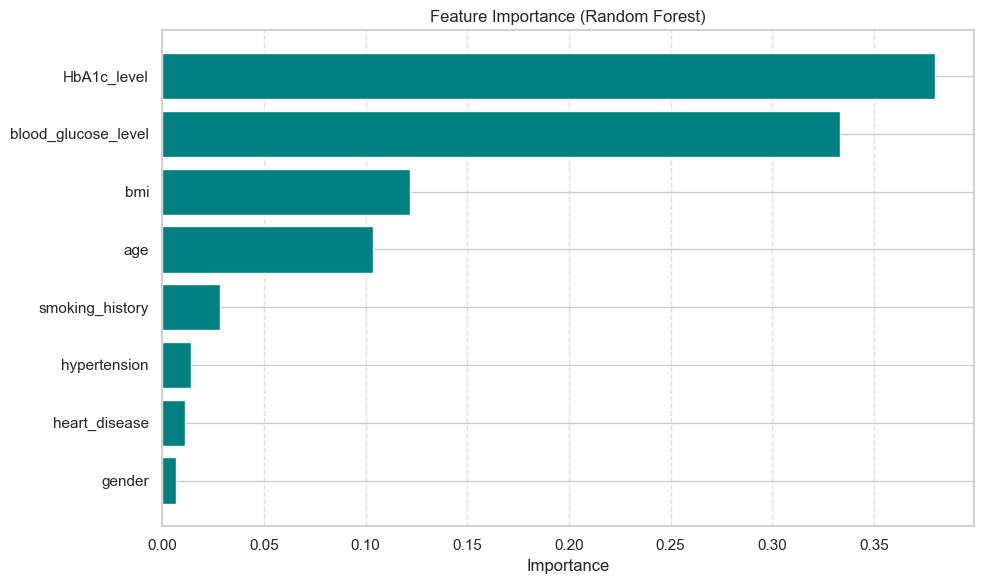

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Encode categorical variables
df_encoded = df.copy()
le_gender = LabelEncoder()
le_smoke = LabelEncoder()

df_encoded['gender'] = le_gender.fit_transform(df_encoded['gender'])
df_encoded['smoking_history'] = le_smoke.fit_transform(df_encoded['smoking_history'])

# Split features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:36] WARNING: C:\actio

📊 Cross-Validation Scores (Accuracy - 5 Fold):
Random Forest      : 0.9702 ± 0.0011
Logistic Regression: 0.9602 ± 0.0006
XGBoost            : 0.9713 ± 0.0011


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import numpy as np

# Models initialization with random_state for reproducibility
model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(max_iter=10000, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform 5-Fold Cross-Validation on preprocessed training data
cv_rf = cross_val_score(model, X_train, y_train, cv=5)
cv_log = cross_val_score(log_model, X_train, y_train, cv=5)
cv_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Output cross-validation scores
print("📊 Cross-Validation Scores on Training Data (Accuracy - 5 Fold):")
print(f"Random Forest      : {cv_rf.mean():.4f} ± {cv_rf.std():.4f}")
print(f"Logistic Regression: {cv_log.mean():.4f} ± {cv_log.std():.4f}")
print(f"XGBoost            : {cv_xgb.mean():.4f} ± {cv_xgb.std():.4f}")

# Optionally: Fit models on full training data and evaluate on test data
model.fit(X_train, y_train)
print(f"\nRandom Forest test accuracy: {model.score(X_test, y_test):.4f}")

log_model.fit(X_train, y_train)
print(f"Logistic Regression test accuracy: {log_model.score(X_test, y_test):.4f}")

xgb_model.fit(X_train, y_train)
print(f"XGBoost test accuracy: {xgb_model.score(X_test, y_test):.4f}")


C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:06:58] WARNING: C:\actio

📊 Cross-Validation Scores on Training Data (Accuracy - 5 Fold):
Random Forest      : 0.9704 ± 0.0007
Logistic Regression: 0.9607 ± 0.0007
XGBoost            : 0.9705 ± 0.0008

Random Forest test accuracy: 0.9707
Logistic Regression test accuracy: 0.9588


C:\Users\baner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost test accuracy: 0.9710
